# <h1 style="color:red; font-family: Arial;">SVM-SALARY DATA</h1>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">Prepare a classification model using SVM for salary data  </h3>

# 2 - Data collection

In [2]:
df = pd.read_csv('./SalaryData_Train(1).csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 3 - EDA

## Check for null and duplicates

In [3]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isna().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

*No Null values*

In [5]:
df.drop(index=list(df[df.duplicated()].index),inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


## Convert non-numeric to numeric

In [7]:
print(f"Non Numeric Columns : {[x for x in df.columns if df[x].dtype=='O']}")

Non Numeric Columns : ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [8]:
## salary is target column therefore using label encoder
lbenc = LabelEncoder()
df['Salary'] = lbenc.fit_transform(df['Salary'])

In [9]:
oe = OrdinalEncoder()
df[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']] = oe.fit_transform(df[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']])

In [10]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0,0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2.0,12.0,14,2.0,3.0,0.0,4.0,1.0,0,0,40,37.0,1
30155,22,2.0,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,37.0,0
30156,27,2.0,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,37.0,0
30158,58,2.0,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,37.0,0


# 4 - Visualization 

<Axes: xlabel='Salary', ylabel='count'>

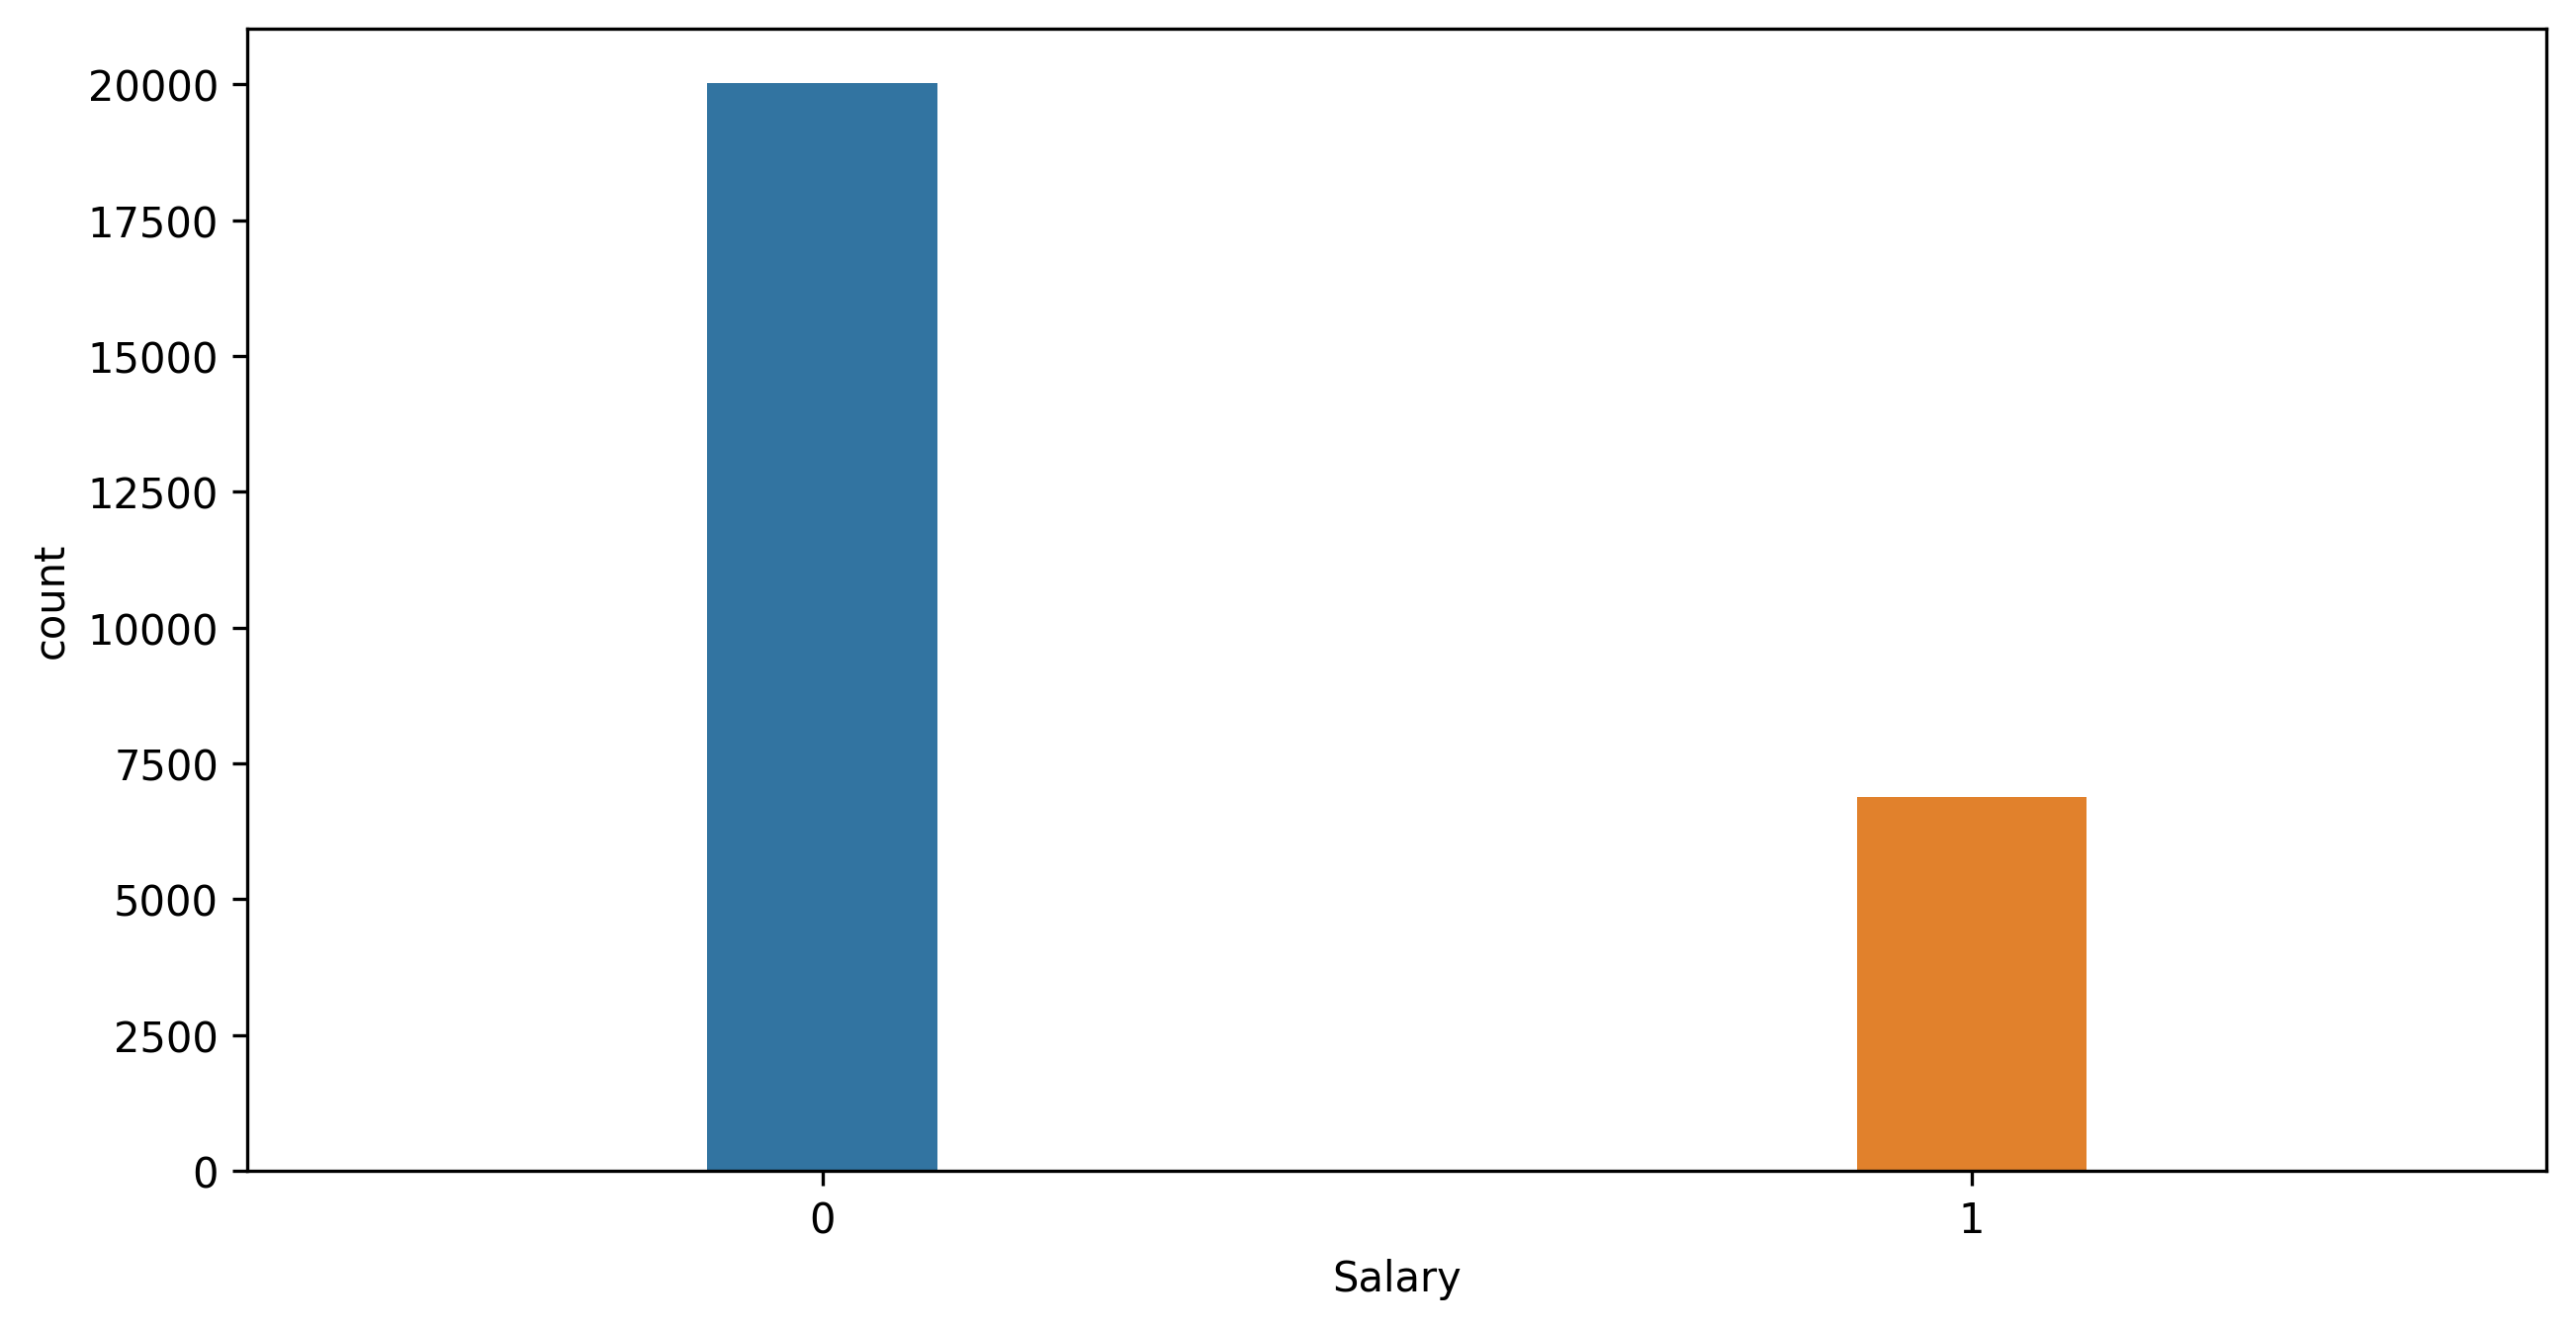

In [11]:
sns.countplot(data=df,x='Salary',width=0.2)

<Axes: xlabel='age', ylabel='education'>

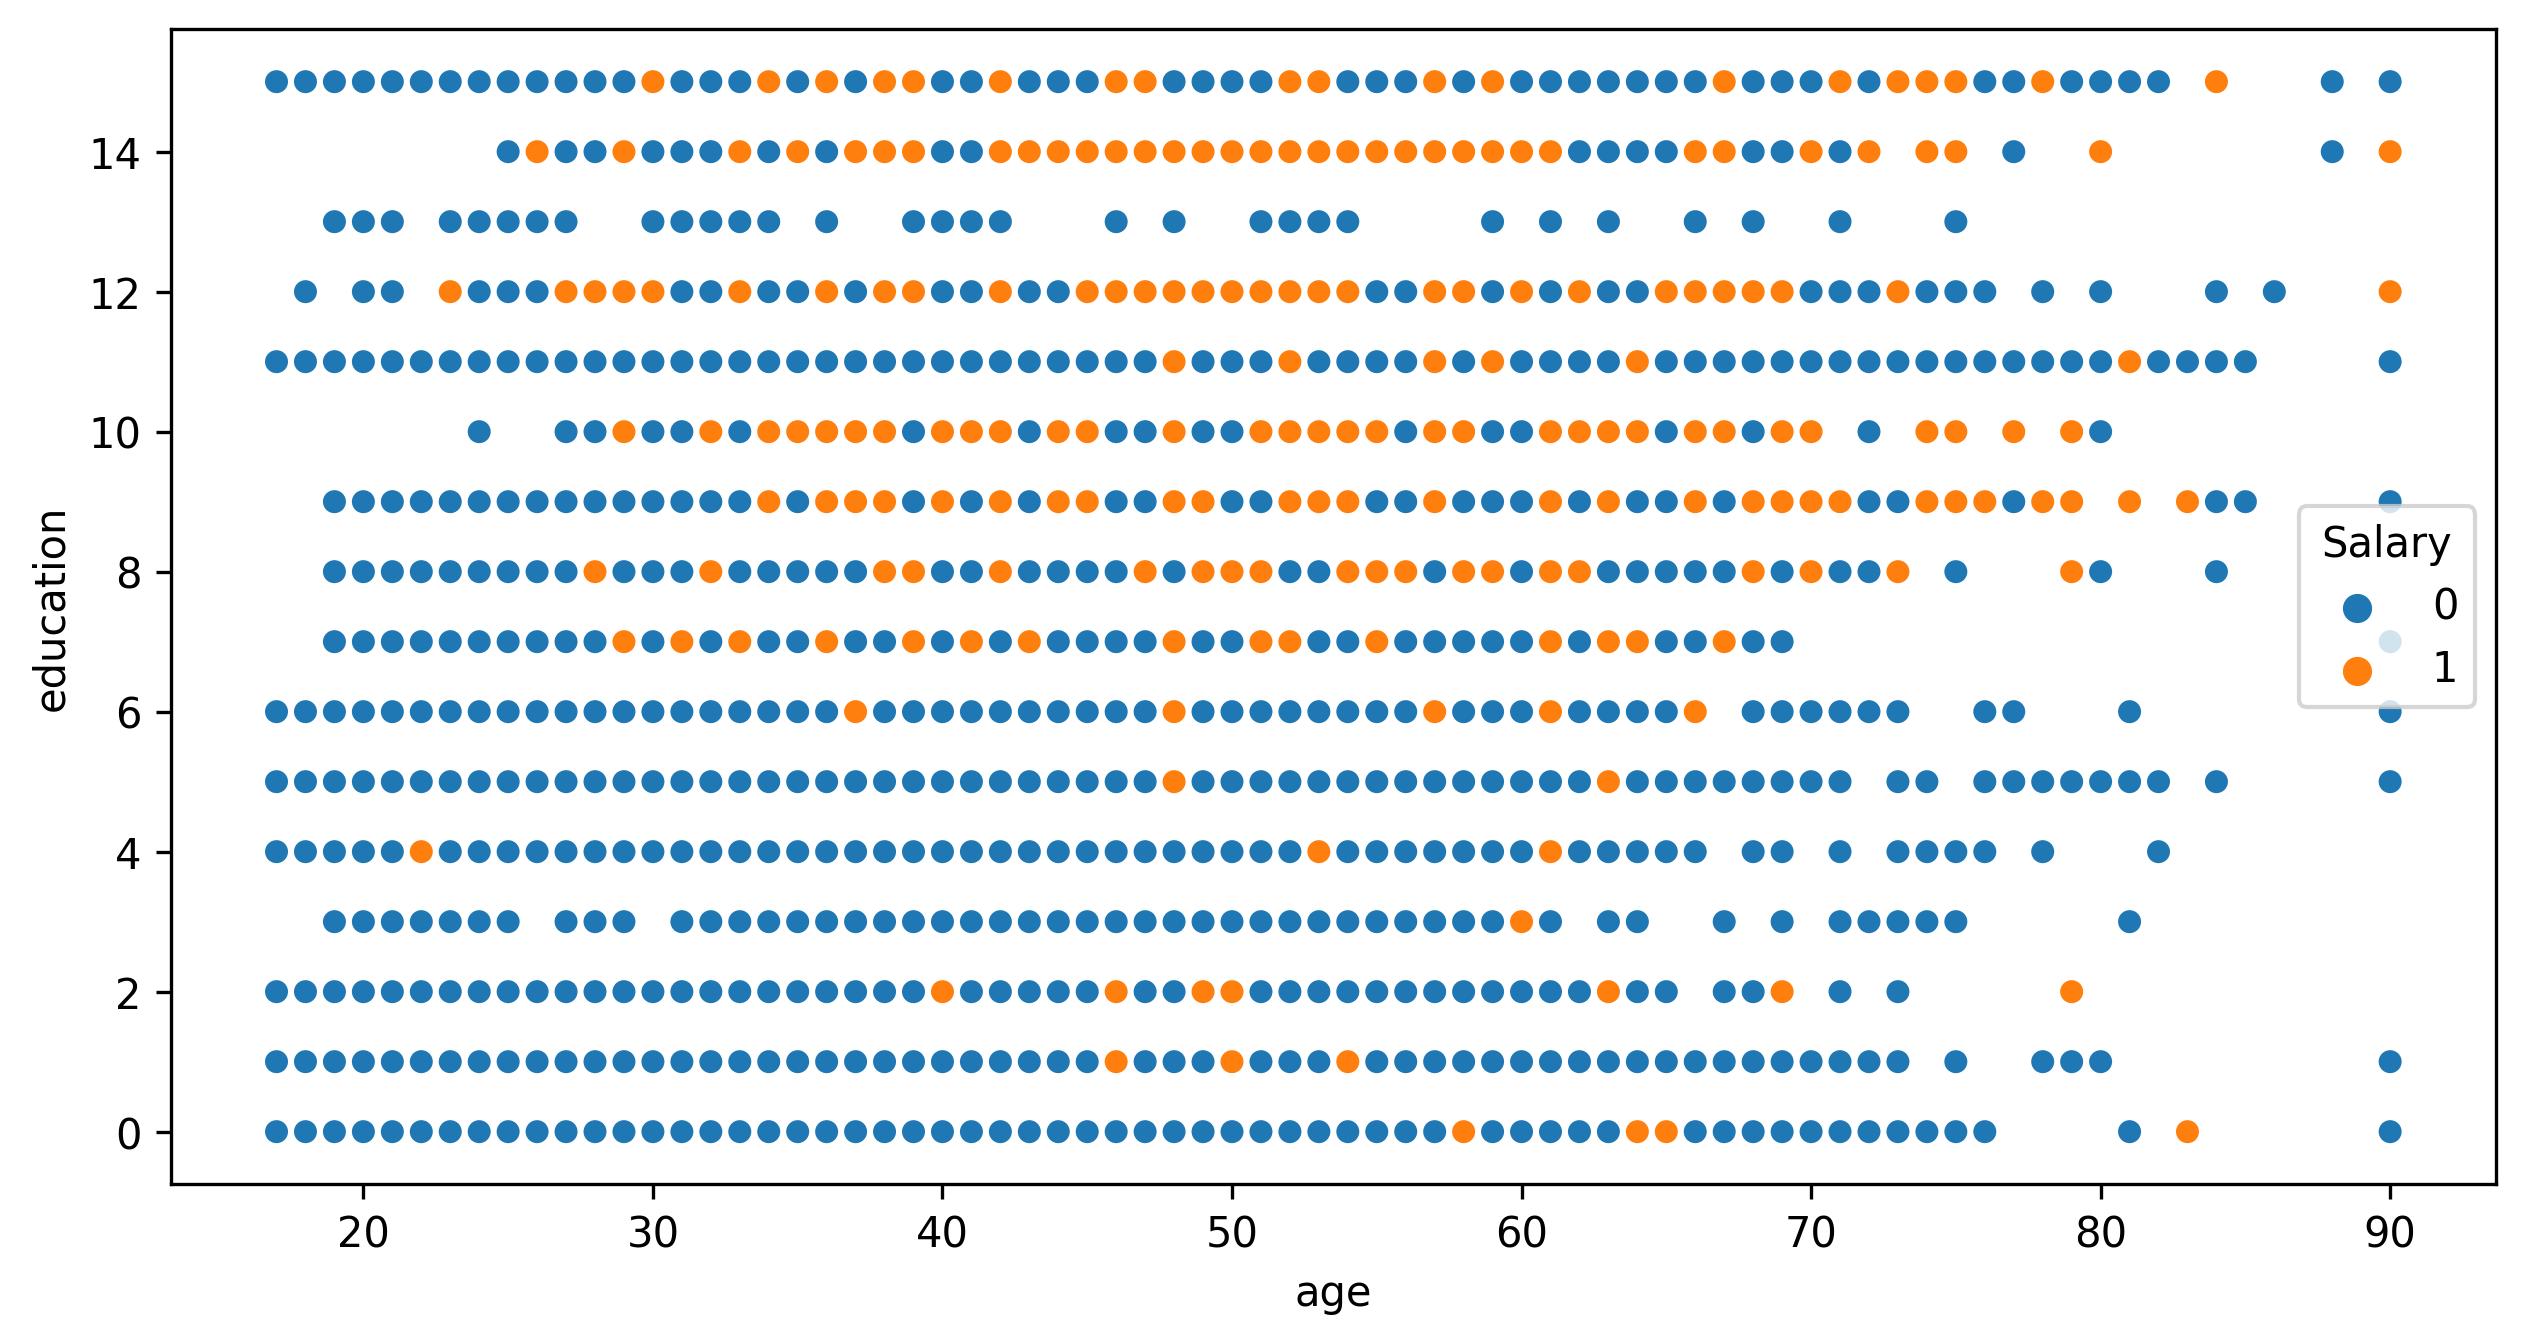

In [12]:
sns.scatterplot(x=df['age'],y=df['education'],hue=df['Salary'])

<Axes: xlabel='age', ylabel='hoursperweek'>

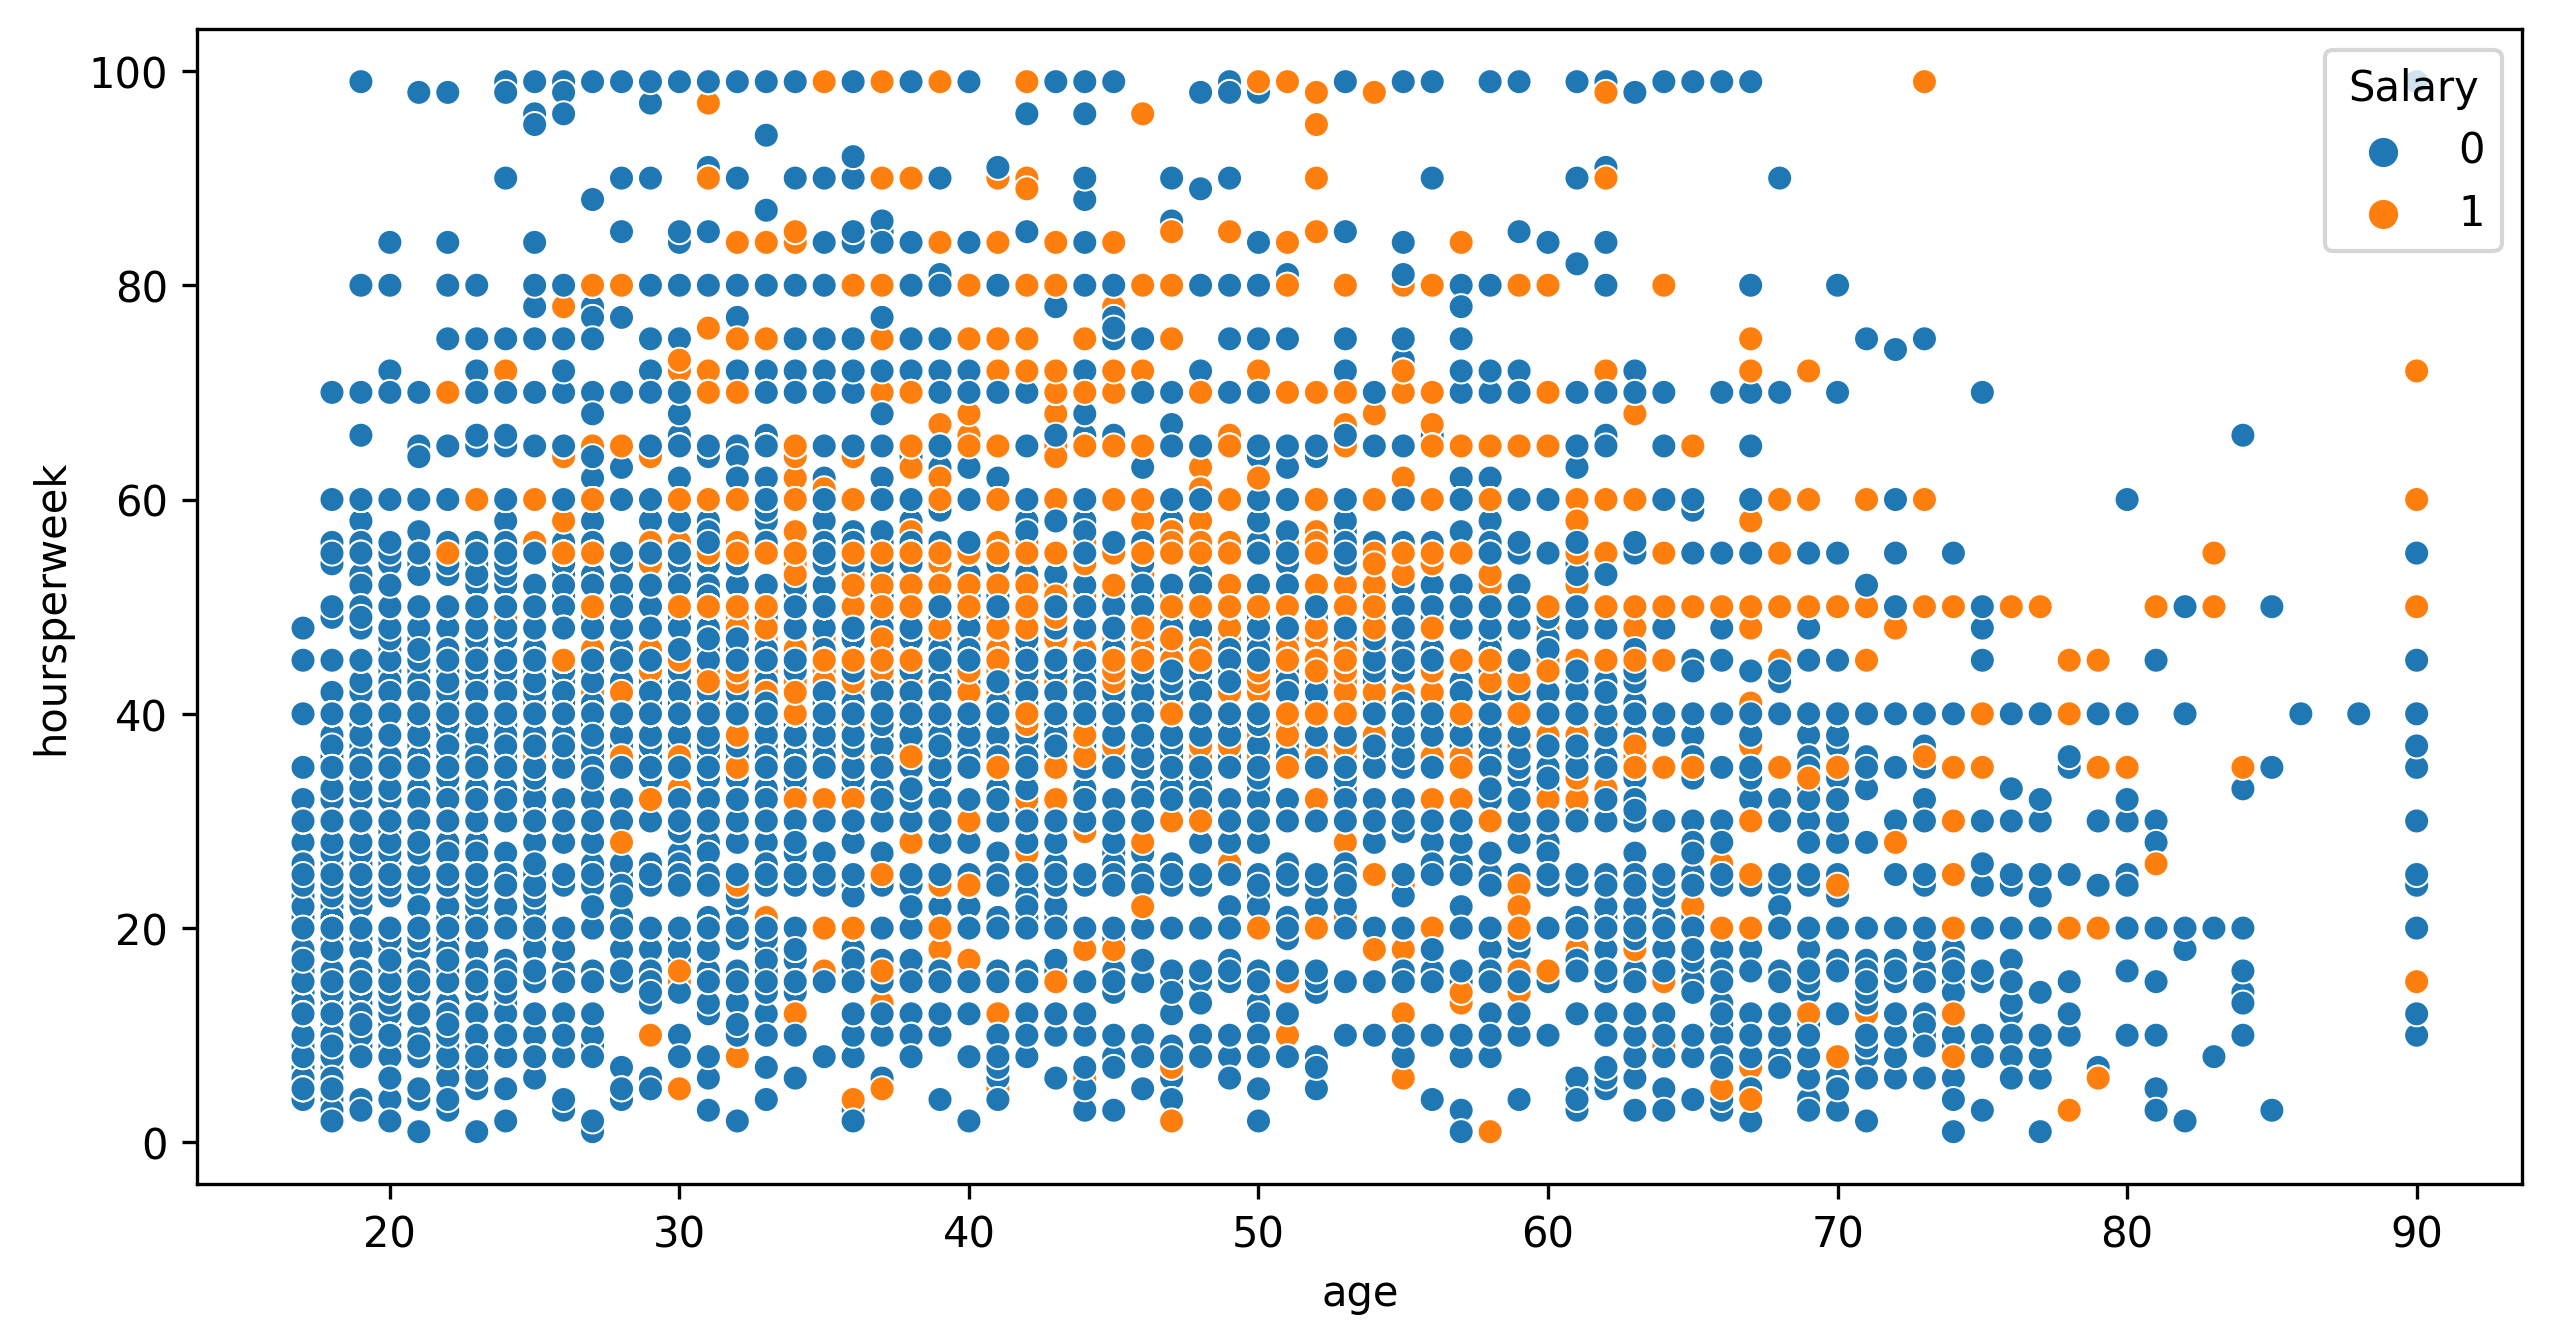

In [13]:
sns.scatterplot(x=df['age'],y=df['hoursperweek'],hue=df['Salary'])

## Data Preprocessing

In [14]:
X = df.drop('Salary',axis=1)
Y = df['Salary']

In [15]:
# standardizing the data
std = StandardScaler()
scaled = std.fit_transform(X)
scaled

array([[-0.00372591,  2.79138305, -0.32451893, ..., -0.23132996,
        -0.09432316,  0.28241436],
       [ 0.83032903,  1.78815577, -0.32451893, ..., -0.23132996,
        -2.28112073,  0.28241436],
       [-0.07954909, -0.2182988 ,  0.19299932, ..., -0.23132996,
        -0.09432316,  0.28241436],
       ...,
       [-0.91360403, -0.2182988 , -0.84203718, ..., -0.23132996,
        -0.25630817,  0.28241436],
       [ 1.43691444, -0.2182988 ,  0.19299932, ..., -0.23132996,
        -0.09432316,  0.28241436],
       [ 0.98197538,  0.78492849,  0.19299932, ..., -0.23132996,
        -0.09432316,  0.28241436]])

# 5 - SVC

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled,Y,test_size=0.15,random_state=42)

In [17]:
svc = SVC()

svc.fit(xtrain,ytrain)

SVC()

In [18]:
print(f"Train Score : {svc.score(xtrain,ytrain)}")
print(f"Test Score : {svc.score(xtest,ytest)}")

Train Score : 0.8466786198451918
Test Score : 0.8436570862239842


In [19]:
ypred = svc.predict(xtest)

In [20]:
print('\033[91m Train Report')
print(classification_report(ytrain,svc.predict(xtrain)))

 Train Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     17002
           1       0.78      0.56      0.65      5865

    accuracy                           0.85     22867
   macro avg       0.82      0.75      0.78     22867
weighted avg       0.84      0.85      0.84     22867



In [21]:
print('\033[92m Test Report')
print(classification_report(ytest,ypred))

 Test Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3021
           1       0.76      0.55      0.64      1015

    accuracy                           0.84      4036
   macro avg       0.81      0.75      0.77      4036
weighted avg       0.84      0.84      0.83      4036



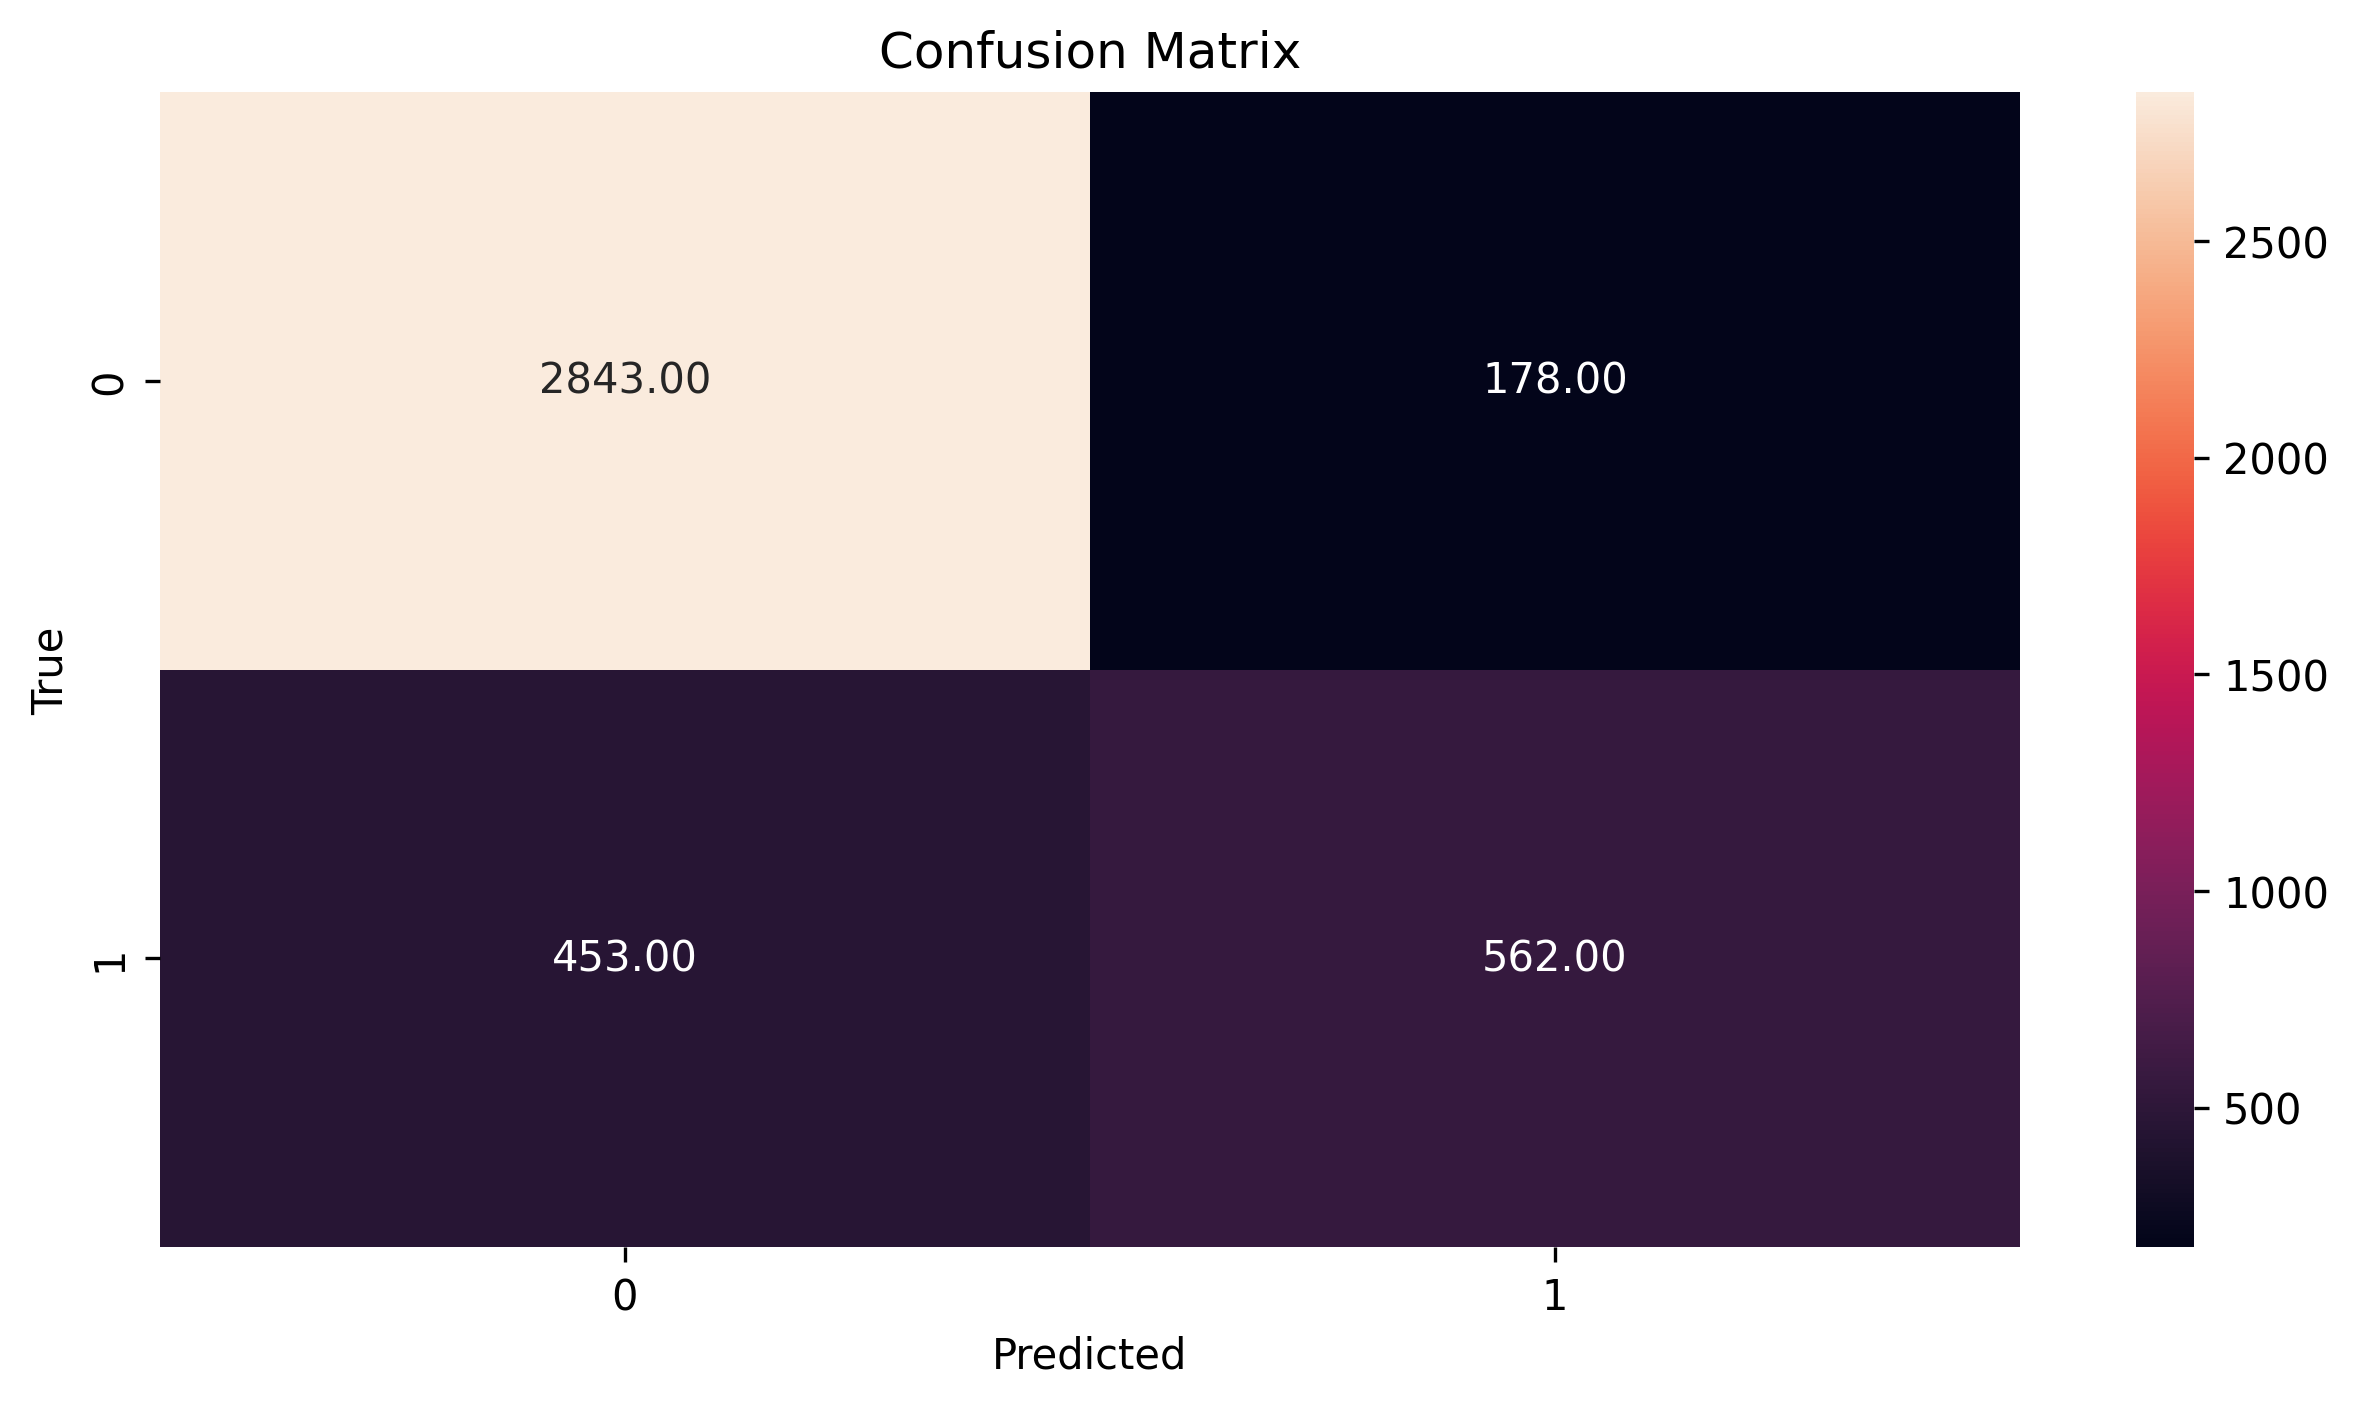

In [22]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='.2f')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# 6 - Hyper parameter Tuning

In [23]:
params = {
    'kernel': ['linear','rbf'],
    'gamma': [0.1,0.01,1,10],
    'C': [0.1,0.001,1,10]
}

In [25]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 10], 'gamma': [0.1, 0.01, 1, 10],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [26]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [27]:
grid.best_score_

0.8388507628902214

# 7 - Final Model

In [28]:
fmodel = SVC(C=1,gamma=0.1,kernel='rbf')

In [29]:
fmodel.fit(xtrain,ytrain)

SVC(C=1, gamma=0.1)

In [30]:
print(f"Train Score : {fmodel.score(xtrain,ytrain)}")
print(f"Test Score : {fmodel.score(xtest,ytest)}")


Train Score : 0.8488214457515196
Test Score : 0.8426660059464817


In [31]:
ypred = fmodel.predict(xtest)

In [32]:
print('\033[91m Train Report')
print(classification_report(ytrain,fmodel.predict(xtrain)))

 Train Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     17002
           1       0.78      0.57      0.66      5865

    accuracy                           0.85     22867
   macro avg       0.82      0.76      0.78     22867
weighted avg       0.84      0.85      0.84     22867



In [33]:
print('\033[92m Test Report')
print(classification_report(ytest,ypred))

 Test Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3021
           1       0.76      0.55      0.64      1015

    accuracy                           0.84      4036
   macro avg       0.81      0.74      0.77      4036
weighted avg       0.84      0.84      0.83      4036



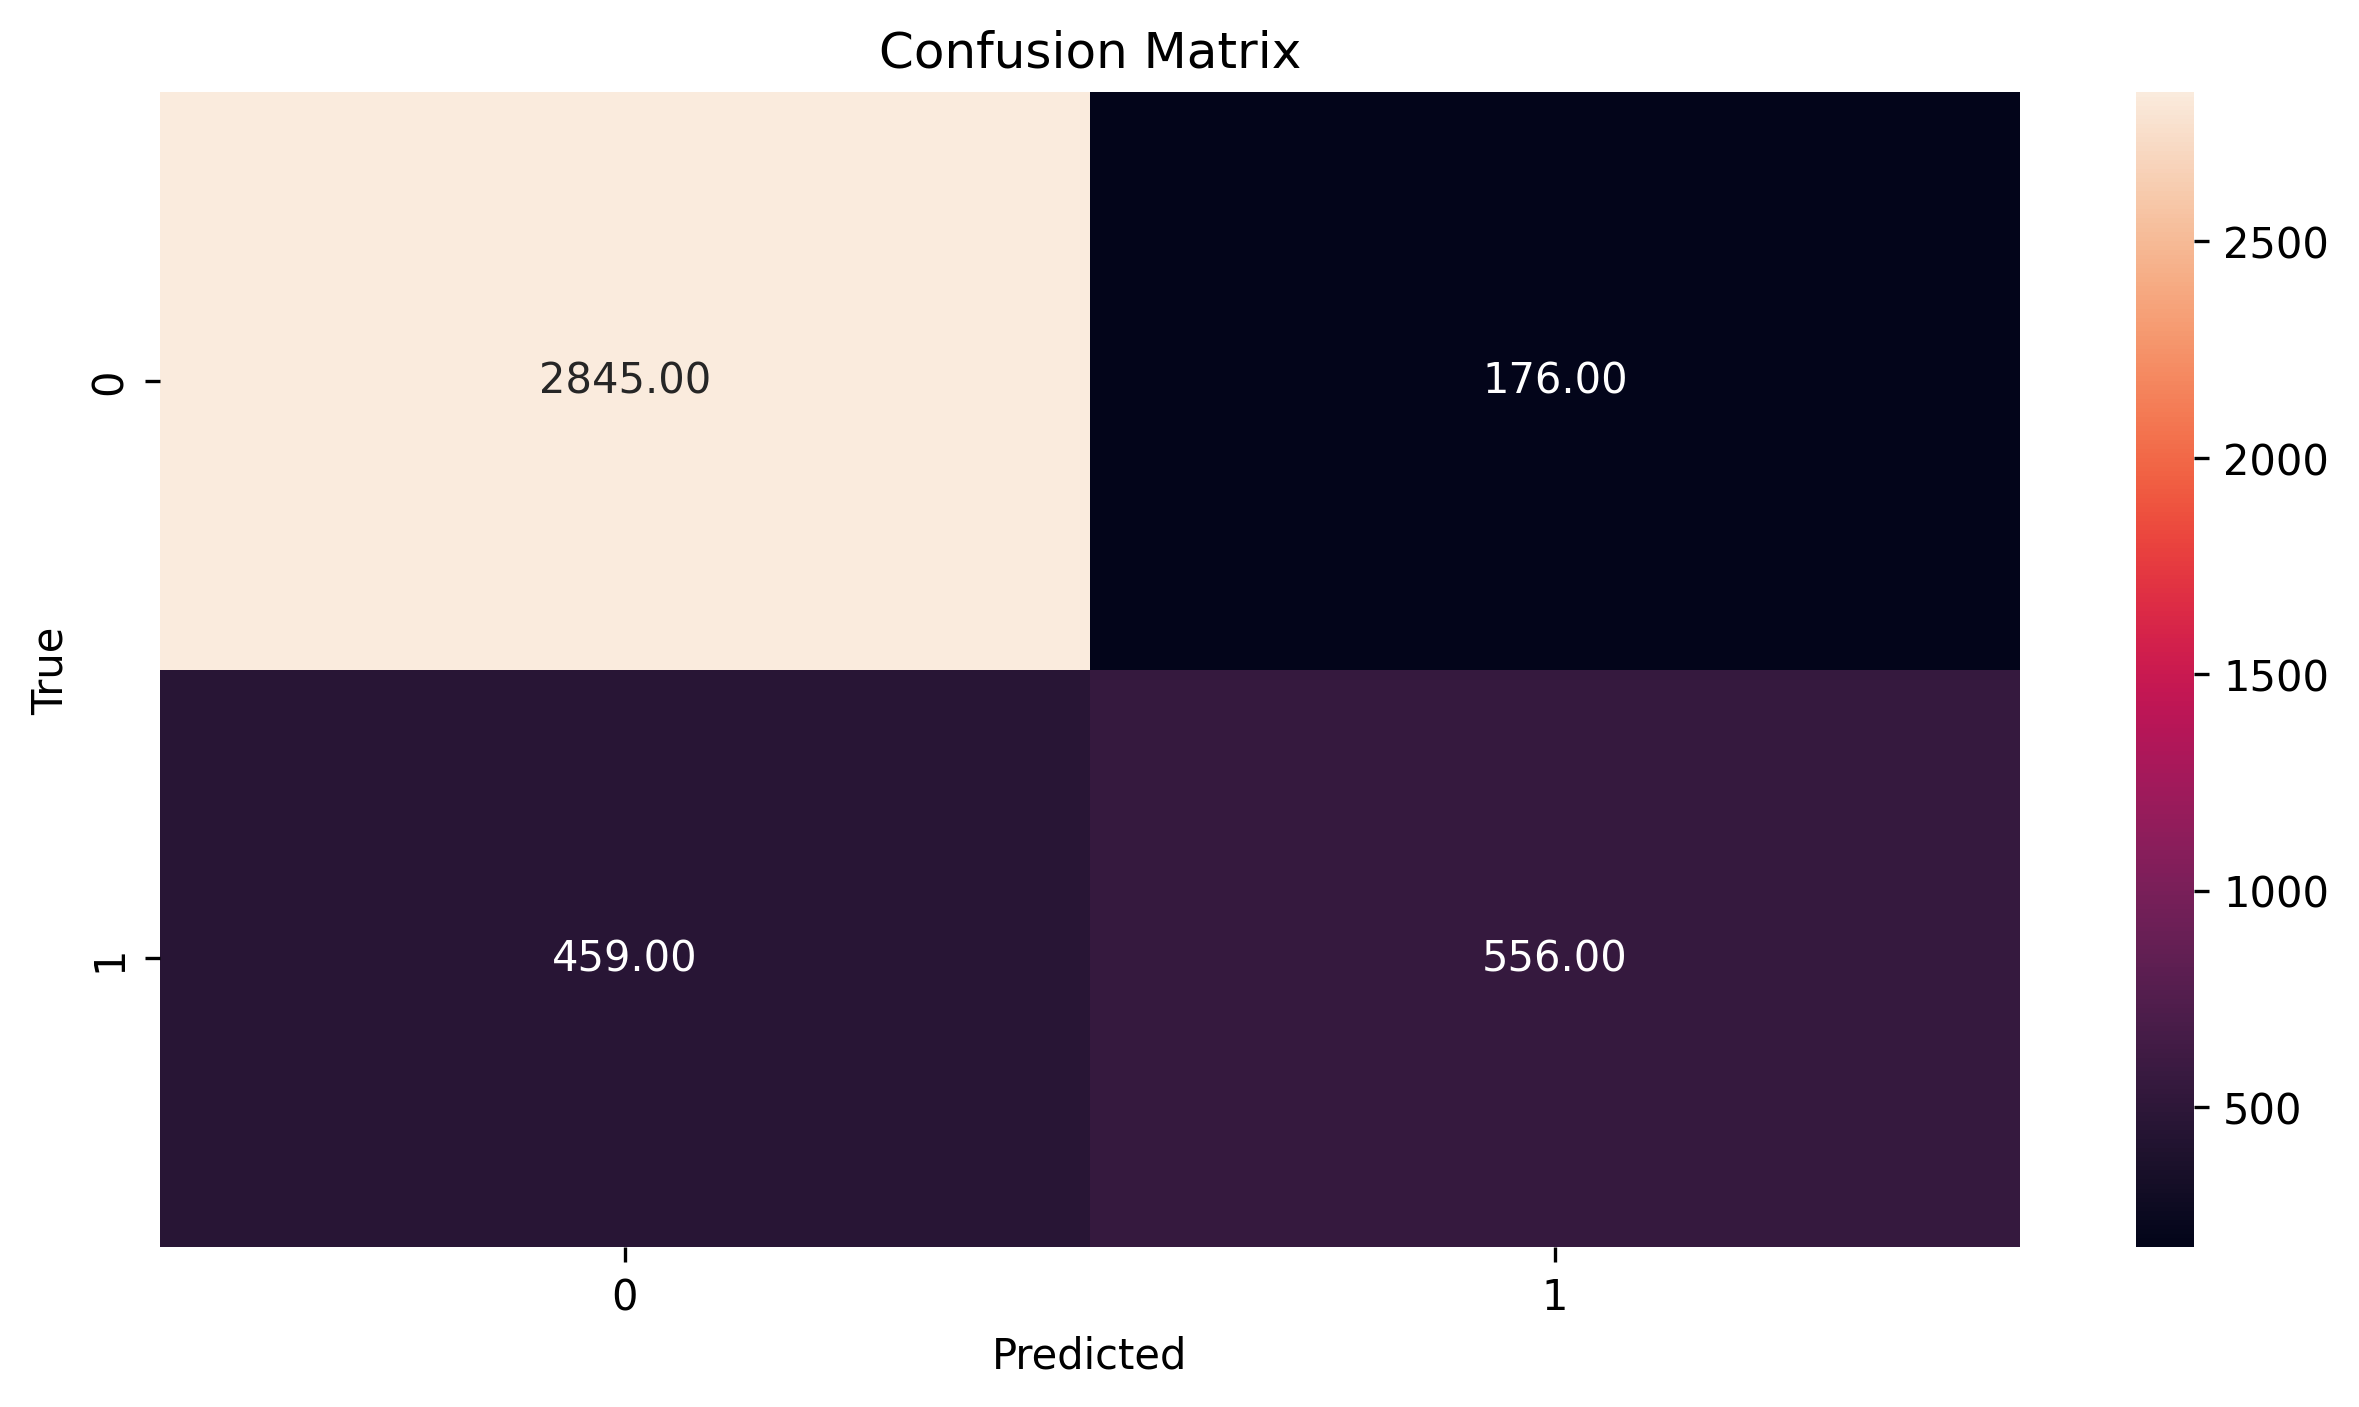

In [34]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='.2f')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# 8 - Prediction on test data

In [35]:
test_df = pd.read_csv('./SalaryData_Test(1).csv')
test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data preprocessing

In [36]:
test_df[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']] = oe.transform(test_df[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']])

In [37]:
test_df['Salary'] = lbenc.transform(test_df['Salary'])

In [38]:
X = test_df.drop('Salary',axis=1)
Y = test_df['Salary']

In [39]:
scaledX = std.transform(X)

## <span style="color:blue; font-family: Arial;">Predictions</span>


In [40]:
print(f"Test Score : {fmodel.score(scaledX,Y)}")

Test Score : 0.8459495351925631


In [41]:
preds = fmodel.predict(scaledX)

In [42]:
print('\033[92m Test Report')
print(classification_report(Y,preds))

 Test Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11360
           1       0.77      0.54      0.63      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.74      0.77     15060
weighted avg       0.84      0.85      0.84     15060

